In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('data/ex1data2.txt', header=None, names=['Size', '# Bedroom', 'Price'])

x = data['Size']
y = data['# Bedroom']
z = data['Price']

nx = (x-np.mean(x))/np.std(x)
ny = (y-np.mean(y))/np.std(y)
nz = (z-np.mean(z))/np.std(z)

In [47]:
# Compute Cost Multi
def computeCostMulti(x1, x2, y, theta=np.zeros((3, 1))):
    m = x1.size  
    nx = np.transpose(np.array(
        [np.ones(m), np.array(x1), np.array(x2)]
    ))      
    
    ny = np.array(y)[:, None]
    h = nx.dot(theta)    # hθ(x)=θTx=θ0 +θ1x1 + θ2x2
    
    return 1 / (2 * m) * np.sum(np.square(h-ny))
 

computeCostMulti(nx, ny, nz)

0.5

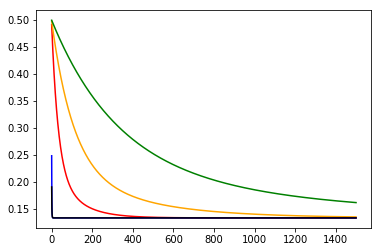

In [77]:
def gradientDescentMulti(x1, x2, y, theta=np.zeros((3, 1)), alpha=0.01, num_iter=1500):
    m = x1.size
    
    J = np.zeros(num_iter)
    
    nx = np.transpose(np.array(
        [np.ones(m), np.array(x1), np.array(x2)]
    ))    
    ny = np.array(y)[:, None] 
    
    for i in range(num_iter):
        h = nx.dot(theta)
        theta = theta - (alpha * (1 / m)) * nx.T.dot(h-ny)
        J[i] = computeCostMulti(x1, x2, y, theta)
        
    return J, theta


J, theta = gradientDescentMulti(nx, ny, nz, alpha=0.01)
plt.plot(J, c='red')
J, theta = gradientDescentMulti(nx, ny, nz, alpha=0.003)
plt.plot(J, c='orange')
J, theta = gradientDescentMulti(nx, ny, nz, alpha=0.001)
plt.plot(J, c='green')

# Bad Learning Rate alpha case
J, theta = gradientDescentMulti(nx, ny, nz, alpha=1)
plt.plot(J, c='blue')
J, theta = gradientDescentMulti(nx, ny, nz, alpha=0.8)
plt.plot(J, c='black')

[[-7.25424449e-17]
 [ 8.84137547e-01]
 [-5.25503786e-02]]
Estimated Price : [4.21099093e+10]


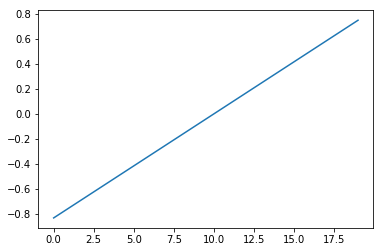

In [87]:
# price prediction for a 1650-square-foot house with 3 bedrooms

J, theta = gradientDescentMulti(nx, ny, nz, alpha=0.01)

x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)
print(theta)

z = theta[0] + theta[1] * x + theta[2] * y 
plt.plot(z)

dx = data['Size']
dy = data['# Bedroom']
dz = data['Price']

zz = theta[0] + theta[1] * (1650-np.mean(dx))/np.std(dx) + theta[2] * (3-np.mean(dy))/np.std(dy)

print('Estimated Price :', (zz+np.mean(dz)*np.std(dz)))